## Introduction - Random Forest Algorithm

* Random forest is a classification and regression algorithm.  
* It is used to solve classification as well as regression problems.  

* Mainly used for classification problems.  
* Forest is the collection of decision trees.  

* Collection of Decision trees is nothing but Random forest algorithm.  
* Random forest algorithm creates decision trees on data samples.  
* It gets the prediction from each of them and finally selects the best solution by means of voting(averaging).  

* It is better than a single decision tree because it reduces overfitting by averaging the result.  


## Why Random Forest Algorithm ?

* The training time is less when compared to other algorithms.  
* It predicts the output with high accuracy.  
* It works well even for large datasets.  
* Even when large portions of data is missing, it maintains good accuracy.  


## Random Forest Algorithm - Working

Random forest algorithm can be understood from the following steps:  
* **Step 1:** First, start with the selection of random samples from the given dataset.  
* **Step 2:** Next, the algorithm will construct a decision tree for every sample.  
* **Step 3:** In this step, voting will be performed for every predicted result.  
* **Step 4:** At last, select the most voted prediction result as the final prediction result.  

## Applications:

* **Banking:** Used to Identify the loan risk.  
* **Medicine:** Disease trends can be analyzed.  
* **Land Use:** Areas of similar land can be identified.  
* **Marketing:** Marketing trends can be analyzed.

## Implementation of Random Forest Algorithm

In [3]:
import numpy as np # Numerical python for calculations
import matplotlib.pyplot as plt # Data visualization
import pandas as pd # Data Manipulation

In [4]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [10]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [11]:
dataset = pd.read_csv(path, names = headernames)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [19]:
# Training
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50) # n_estimators is how many trees in random forest
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [21]:
# Testing
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Results
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(result)
result_1 = classification_report(y_test, y_pred)
print("\nClassification Report: ")
print(result_1)
result_2 = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", result_2)

Confusion Matrix: 
[[12  0  0]
 [ 0 12  1]
 [ 0  0 20]]

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45


Accuracy:  0.9777777777777777


# CREDIT CARD FRAUD DETECTION USING RANDOM FOREST ALGORITHM

In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(2)

In [59]:
data = pd.read_csv('Datasets/creditcard.csv')

## Data Exploration

In [60]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
data.shape

(284807, 31)

## Pre-Processing

In [62]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'], axis = 1)

In [63]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [64]:
data = data.drop(['Time'], axis = 1)

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [65]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [66]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
X_train.shape

(199364, 29)

In [69]:
X_test.shape

(85443, 29)

## RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
random_forest = RandomForestClassifier(n_estimators = 100)

In [74]:
random_forest.fit(X_train, y_train.values.ravel()) # Training the Model

RandomForestClassifier()

In [75]:
y_pred = random_forest.predict(X_test)

In [76]:
random_forest.score(X_test, y_test)

0.9995084442259752

In [79]:
cnf_matrix = confusion_matrix(y_test, y_pred) # Evaulation matrix, 
# how close the predicted value is close to the true value.

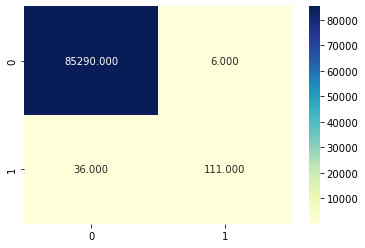

In [82]:
labels = [0, 1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt = ".3f", xticklabels=labels, yticklabels=labels)
plt.show()
# Predicted values along x-axis
# True values along y-axis

In [84]:
y_pred = random_forest.predict(X)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
cnf_matrix = confusion_matrix(y, y_pred.round())

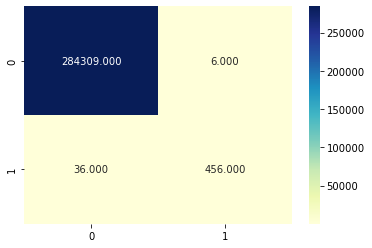

In [88]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()